In [24]:
# importing laibaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
## loading the dataset
df=pd.read_csv('glass.csv')

In [26]:
## checking the data
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
df.shape

(214, 10)

In [96]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## graphical reprsentation

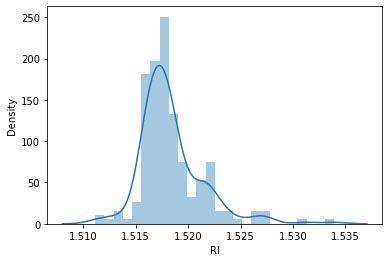

In [27]:
## checking for RI
sns.distplot(df['RI'])
import warnings
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='Na', ylabel='Density'>

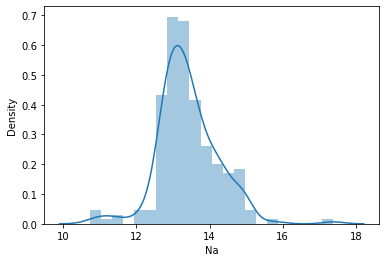

In [28]:
## checking for Na
sns.distplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

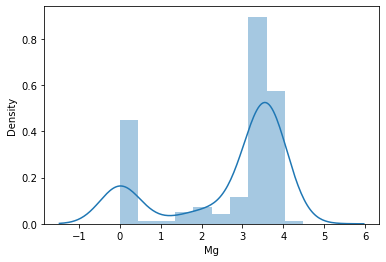

In [29]:
## checking for Mg
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

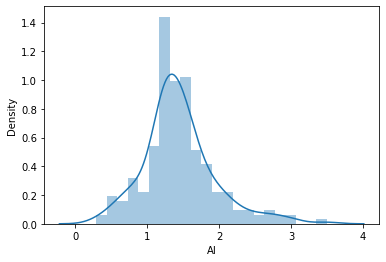

In [30]:
## checking for Al
sns.distplot(df['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

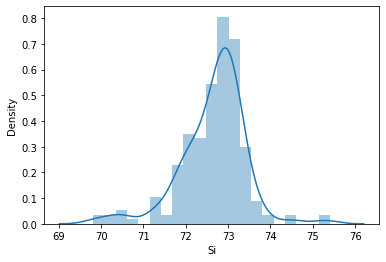

In [31]:
## checking for Si
sns.distplot(df['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

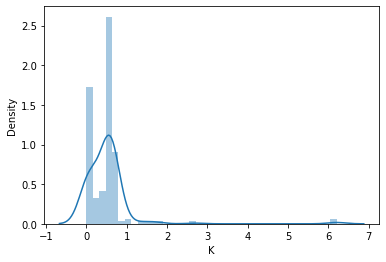

In [32]:
## checking for K
sns.distplot(df['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

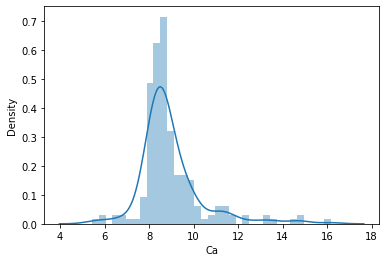

In [33]:
## checking for Ca
sns.distplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

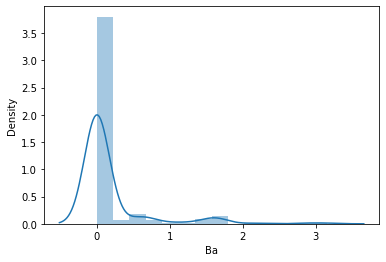

In [34]:
## checking for Ba
sns.distplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

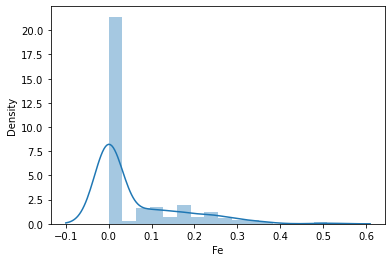

In [35]:
## checking for Fe
sns.distplot(df['Fe'])

<AxesSubplot:xlabel='Type', ylabel='count'>

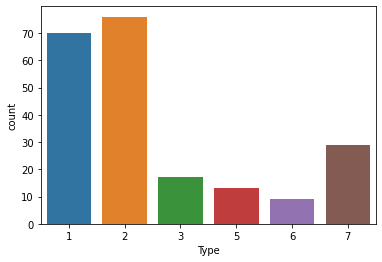

In [36]:
## checking for Fe
sns.countplot(df['Type'])

## all data looking normal

In [37]:
## spliting our target & features
x=df.drop(['Type'],axis=1)
y=df['Type']

## Building model

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [90]:
num_folds = 30
kfold = KFold(n_splits=30)

In [91]:
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, x, y, cv=kfold)

In [92]:
print(results.mean())

0.5779761904761904


## Checking correct parametres with grid search cv.

In [45]:
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [46]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [47]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [93]:
## Building the final model
model1 = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model1, x, y, cv=kfold)
print(results.mean())

0.6642857142857143


# So our model accuracy is 66% 

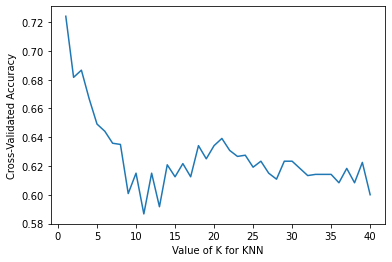

In [94]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Above graph shows that our model gives better accuracy at n_neighbors=1.